### Downloading Heart Disease Dataset from kaggle and saving it to /data

In [ ]:
import kagglehub
import shutil
import os

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

target_dir = "data"
os.makedirs(target_dir, exist_ok=True)

for item in os.listdir(path):
    src = os.path.join(path, item)
    dst = os.path.join(target_dir, item)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dst)

print(f"Data saved in: {os.path.abspath(target_dir)}")


Data saved in: /home/michal/Projects/cvd-risk-prediction-ml/data


### Visualising data

In [4]:
import pandas as pd
import os

data_path = os.path.join("../data", "heart.csv")

df = pd.read_csv(data_path)
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check if there are missing values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Number of healthy vs sick

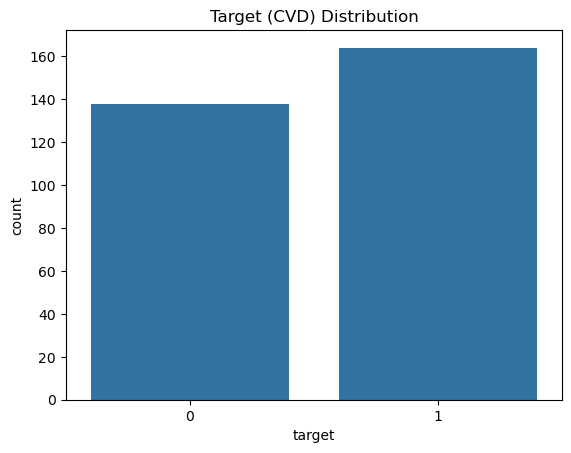

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize target distribution
sns.countplot(x='target', data=df)
plt.title('Target (CVD) Distribution')
plt.show()

### Number of healthy and sick by age

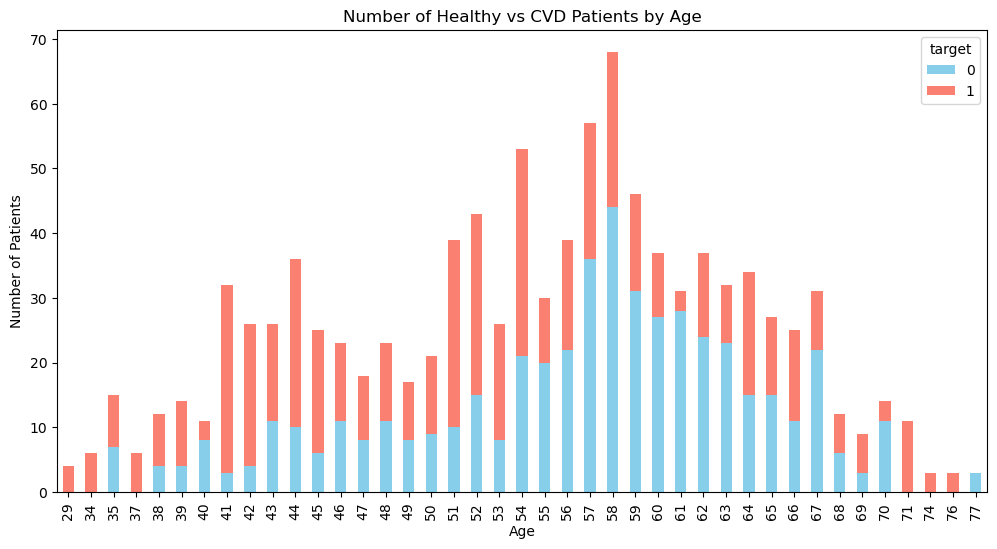

In [15]:
age_target_counts = df.groupby(['age', 'target']).size().unstack(fill_value=0)

age_target_counts.plot(kind='bar', stacked=True, figsize=(12,6), color=['skyblue','salmon'])
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Number of Healthy vs CVD Patients by Age')
plt.show()


In [9]:
df.groupby('sex')['target'].mean()


sex
0    0.750000
1    0.446602
Name: target, dtype: float64